# Data Mining Assignment 2
by Fayyaz Minhas

Version: Feb 16, 2024

## Image Data Download

You can do it manually as well from the given URL.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!wget https://warwick.ac.uk/fac/sci/dcs/teaching/material/cs909/patches_256.zip
#!unzip /content/patches_256.zip -d /content/

## Download and load expression data into a dataframe

This data can be read using this code (not to be changed). Each row in the resulting data frame contains information about a single spot such as its spatial location coordinates (Location_Center_Y, Location_Center_X) and the expression values of 38 different proteins. The names of the proteins are given in the list “proteins_names”.  The code  also creates two additional columns 'specimen_id' and 'image_id' which will be needed for this assignment. df.specimen_id contains the identifier or name of the specimen (A1, B1, C1 or D1) from which the spot originates.  df.image_id contains the file name of the image file corresponding to each spot (without the png extension).

Note there may be some images for which no expression is available. You can drop those images.


In [3]:
import pandas as pd
df = pd.read_csv('https://warwick.ac.uk/fac/sci/dcs/teaching/material/cs909/protein_expression_data.csv')


df['specimen_id']=df.VisSpot.apply(lambda x: x.split('-')[2]) #create specimen id field
df['image_id']=df.VisSpot.apply(lambda x: x.split('-')[2])+'_'+df.id #create image id field
df = df.set_index('image_id').sort_index()
protein_names = ['SMAa', 'CD11b',
       'CD44', 'CD31', 'CDK4', 'YKL40', 'CD11c', 'HIF1a', 'CD24', 'TMEM119',
       'OLIG2', 'GFAP', 'VISTA', 'IBA1', 'CD206', 'PTEN', 'NESTIN', 'TCIRG1',
       'CD74', 'MET', 'P2RY12', 'CD163', 'S100B', 'cMYC', 'pERK', 'EGFR',
       'SOX2', 'HLADR', 'PDGFRa', 'MCT4', 'DNA1', 'DNA3', 'MHCI', 'CD68',
       'CD14', 'KI67', 'CD16', 'SOX10']
print(df)


          Unnamed: 0                VisSpot  Location_Center_Y  \
image_id                                                         
A1_0x40          412  AAGTAAGCTTCCAAAC-1-A1         764.003658   
A1_0x42         7325  GTTTGAGCGGTTATGT-1-A1         799.511111   
A1_0x44         8102  TCACTCAGCGCATTAG-1-A1         832.902467   
A1_0x46         7085  GTGCGCTTACAAATGA-1-A1         858.343544   
A1_0x48         3748  CGAAGACTGCCCGGGA-1-A1         892.179831   
...              ...                    ...                ...   
D1_9x63         3609  CCTCCCGACAATCCCT-1-D1         123.760525   
D1_9x65          172  AACACGACTGTACTGA-1-D1          29.281573   
D1_9x67         2686  CACCGCCGACCAGCGA-1-D1         938.403662   
D1_9x69         2813  CAGAGTGATTTAACGT-1-D1         844.093656   
D1_9x71         6877  GTCAGTTGTGCTCGTT-1-D1         740.107483   

          Location_Center_X      SMAa     CD11b      CD44      CD31      CDK4  \
image_id                                                    

In [4]:
image_folder = '/content/drive/MyDrive/data mining lab/assignment 2/patches_256'

# Showing an example image

The code below will load an example image. It also shows how you can get the HED channels.

In [5]:
filtered_df = df[df['specimen_id'].isin(['A1', 'B1', 'D1'])]
filtered_df_C1 = df[df['specimen_id'].isin(['C1'])]

skimage version 0.19.3


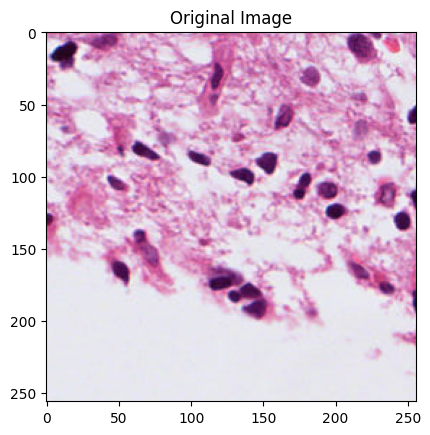

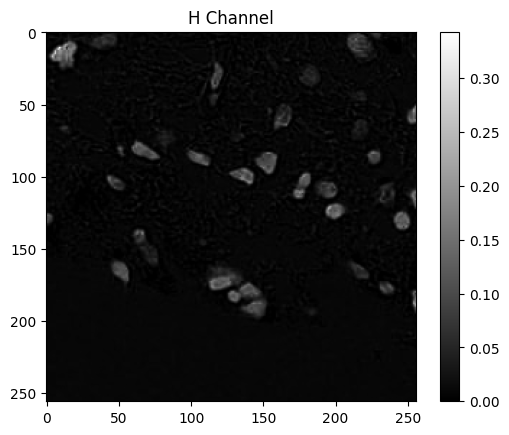

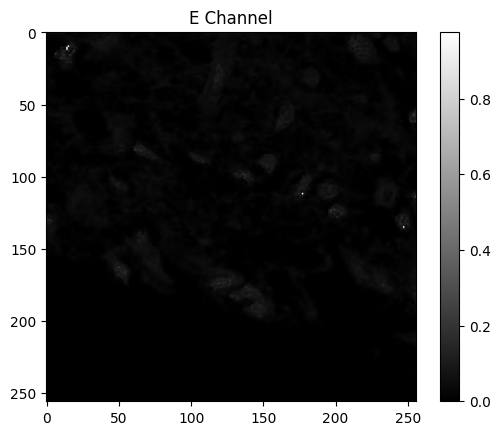

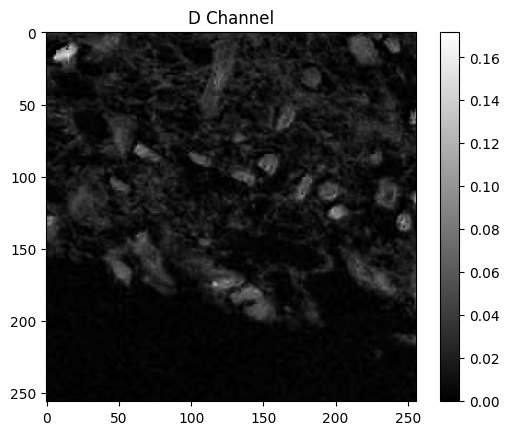

In [7]:
image_folder = '/content/drive/MyDrive/data mining lab/assignment 2/patches_256'
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt
print('skimage version',skimage.__version__)

# Replace 'path_to_image' with the path to the image you want to display
example_image_path = image_folder+'/A1_0x40.png'
I = rgba2rgb(imread(example_image_path)) #read sample RGB image
I_hed =  rgb2hed(I) #convert to HED
plt.imshow(I);plt.title('Original Image');plt.show()
I_h = I_hed[:,:,0]; plt.figure(); plt.imshow(I_h,cmap='gray');plt.colorbar();plt.title('H Channel');plt.show()
I_e = I_hed[:,:,1]; plt.figure();  plt.imshow(I_e,cmap='gray');plt.colorbar();plt.title('E Channel');plt.show()
I_d = I_hed[:,:,2]; plt.figure();  plt.imshow(I_d,cmap='gray');plt.colorbar();plt.title('D Channel');plt.show()


## Useful hints:
* Feel free to resize the images to reduce the amount of required compute. However, if you do this, please ensure that the code for doing this is included in your submission notebook.

* Look at glob (https://docs.python.org/3/library/glob.html) to get list of all file names in a given folder.

* For calculating various regression metrics, please see: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics


# Question 1

- i. Counting Examples: Determine the number of "examples" or spots present in each specimen

- I first remove the unlabeled images.

- I have run the code so it say it delete 1 image without label. But eventually, all the images in the image folder have labels, and the sum of images is 9921.

In [8]:
import os

image_folder = '/content/drive/MyDrive/data mining lab/assignment 2/patches_256'

deleted_count = 0
specimen_counts = {'A1': 0, 'B1': 0, 'C1': 0, 'D1': 0}

# Iterate through the images in your specified folder
for filename in os.listdir(image_folder):
    # Extract image_id from filename (assuming image_id corresponds to the start of the filename up to the extension)
    image_id = filename.rsplit('.', 1)[0]

    # Check if the image_id exists in the DataFrame's index
    if image_id not in df.index:
        # If the image_id does not exist, delete the image
        file_path = os.path.join(image_folder, filename)
        os.remove(file_path)
        deleted_count += 1
    else:
        # If the image exists in the DataFrame, update the count for the corresponding specimen
        specimen_id = df.loc[image_id, 'specimen_id']
        if specimen_id in specimen_counts:
            specimen_counts[specimen_id] += 1

# Print the results
if deleted_count == 0:
    print("No images were deleted. Here are the counts for each specimen:")
else:
    print(f"Deleted {deleted_count} images with no labels.")

for specimen, count in specimen_counts.items():
    print(f"{specimen}: {count}")


No images were deleted. Here are the counts for each specimen:
A1: 2894
B1: 1145
C1: 4129
D1: 1753


- the unlabeled images have been deleted

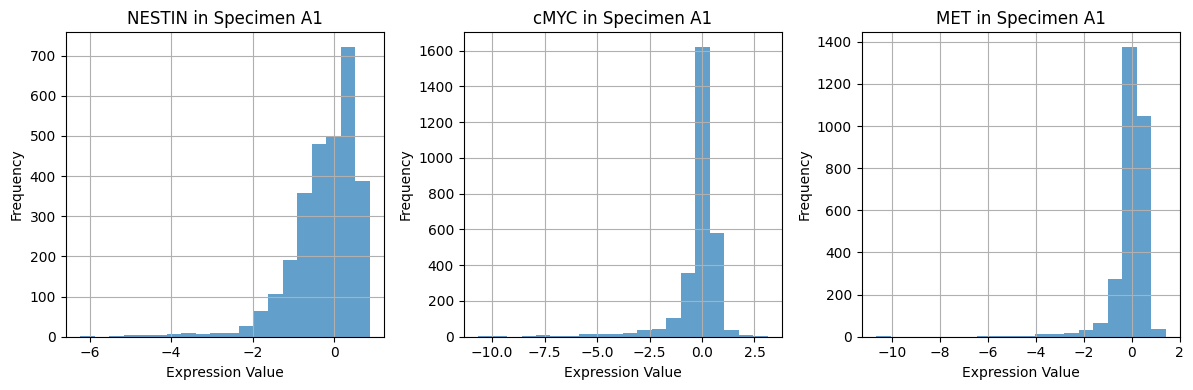

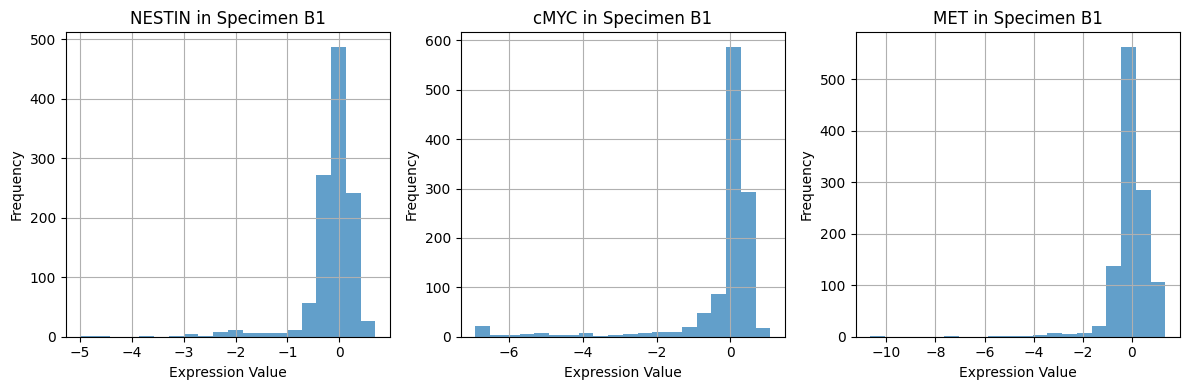

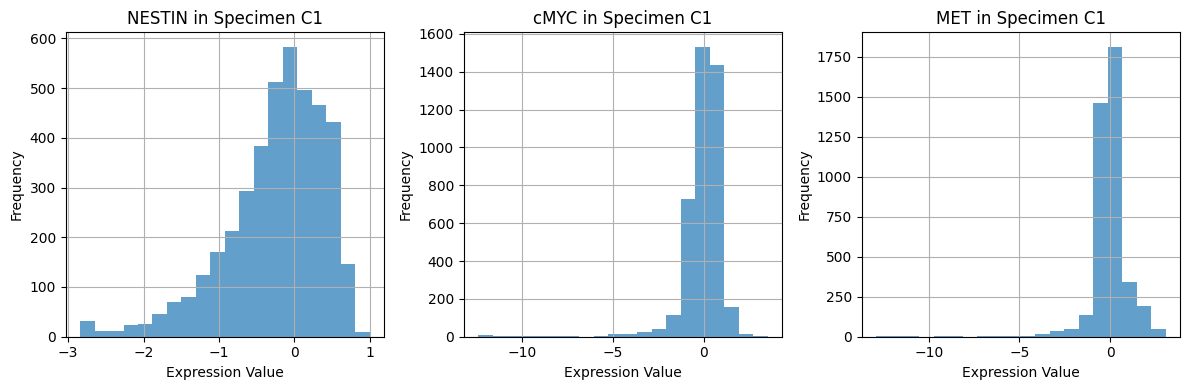

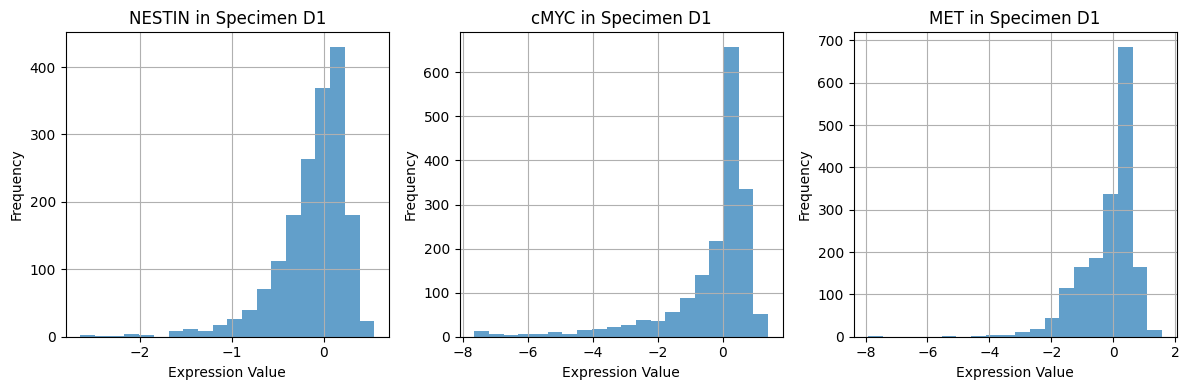

In [9]:
#ii. Protein Expression Histograms: For each specimen,
#generate histograms to visualize the expression values of 'NESTIN', 'cMYC', and 'MET'
#and discuss your observations.
import matplotlib.pyplot as plt

# List of proteins to plot
proteins = ['NESTIN', 'cMYC', 'MET']

# Loop through each unique specimen
for specimen in df['specimen_id'].unique():
    # Filter the DataFrame for the current specimen
    df_specimen = df[df['specimen_id'] == specimen]

    # Create a figure for the histograms
    plt.figure(figsize=(12, 4))

    # Loop through each protein and plot its histogram
    for i, protein in enumerate(proteins, 1):
        plt.subplot(1, 3, i) # 1 row, 3 columns, ith subplot
        df_specimen[protein].hist(bins=20, alpha=0.7)
        plt.title(f'{protein} in Specimen {specimen}')
        plt.xlabel('Expression Value')
        plt.ylabel('Frequency')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


Q.1.ii.
The hisgrams show,

- All specimens show a tendency for left-skewed distributions for all three genes, indicating that there are more low expression values than high values.
- B1 tends to show a narrower range of expression compared to A1.
- C1 consistently shows the most pronounced peaks and the least variability in expression values for all three genes.
- D1 seems to have a balance between the broader range of A1 and the sharp peaks of C1, showing moderate variability and distribution centered slightly closer to zero.

Then
- Convert image from RGB to HED color space.
- Here I only show 3 image examples.

skimage version: 0.19.3


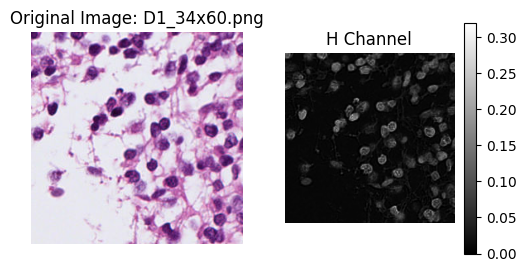

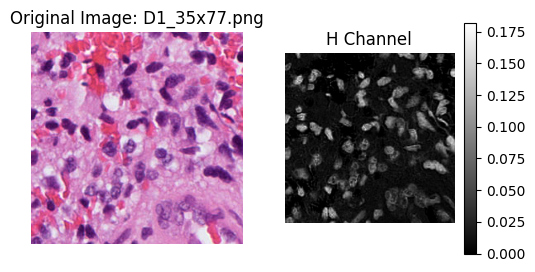

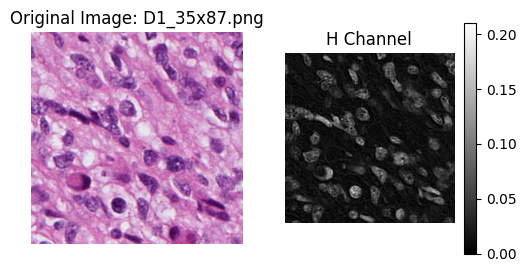

In [10]:
#1.iii
from skimage.color import rgb2hed, rgba2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import os
import skimage
image_folder = '/content/drive/MyDrive/data mining lab/assignment 2/patches_256'
print('skimage version:', skimage.__version__)

def get_image_paths(directory, image_groups,limit):
    image_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            for group in image_groups:
                if file.startswith(group):
                    image_paths.append(os.path.join(root, file))
                    if len(image_paths) == limit:
                        return image_paths
    return image_paths

def convert_and_display(image_paths):
    for example_image_path in image_paths:
        I = imread(example_image_path)
        if I.shape[-1] == 4:
            I = rgba2rgb(I)
        I_hed = rgb2hed(I)
        I_h = I_hed[:, :, 0]  # Extract the H channel

        plt.figure(figsize=(6, 3))
        plt.subplot(1, 2, 1)
        plt.imshow(I)
        plt.title(f'Original Image: {os.path.basename(example_image_path)}')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(I_h, cmap='gray')
        plt.colorbar()
        plt.title('H Channel')
        plt.axis('off')
        plt.show()


directory = image_folder
image_groups = ['A1', 'B1','C1','D1']
example_image_paths = get_image_paths(directory, image_groups,limit=3)
convert_and_display(example_image_paths)




iv. I add a new column to the df to store the H channel average intensity.
- I  import ProcessPoolExecutor from concurrent.futures to speed up the calcuation.

In [11]:
import os
max_workers = os.cpu_count()
print(max_workers)

2


In [12]:
import os
import numpy as np
from skimage.io import imread
from skimage.color import rgba2rgb, rgb2hed
from concurrent.futures import ThreadPoolExecutor

def calculate_h_channel_average(image_file):
    image_path = os.path.join(image_folder, image_file)
    try:
        I = imread(image_path)
        if I.shape[-1] == 4:  # Convert RGBA to RGB
            I = rgba2rgb(I)
        I_hed = rgb2hed(I)
        I_h = I_hed[:, :, 0]
        return np.mean(I_h)
    except Exception as e:
        return None


# Generate the list of image files from the DataFrame
image_files = df.index.map(str) + ".png"

# Use ThreadPoolExecutor to parallelize the image processing
with ThreadPoolExecutor(max_workers=2) as executor:
    h_channel_averages = list(executor.map(calculate_h_channel_average, image_files))

df['H_channel_average'] = h_channel_averages


In [13]:
# Check the first few rows to verify the 'H_channel_average' column
print(df.head())


          Unnamed: 0                VisSpot  Location_Center_Y  \
image_id                                                         
A1_0x40          412  AAGTAAGCTTCCAAAC-1-A1         764.003658   
A1_0x42         7325  GTTTGAGCGGTTATGT-1-A1         799.511111   
A1_0x44         8102  TCACTCAGCGCATTAG-1-A1         832.902467   
A1_0x46         7085  GTGCGCTTACAAATGA-1-A1         858.343544   
A1_0x48         3748  CGAAGACTGCCCGGGA-1-A1         892.179831   

          Location_Center_X      SMAa     CD11b      CD44      CD31      CDK4  \
image_id                                                                        
A1_0x40          247.700528 -2.895476 -1.445686 -1.875972 -3.456108  0.461409   
A1_0x42          184.389514 -2.895476 -1.198798 -2.070174 -3.456108 -0.002521   
A1_0x44          109.598681 -2.895476 -1.631987 -1.920100 -3.456108  0.549366   
A1_0x46           42.981582 -2.895476 -1.922144 -1.941790 -3.456108  0.639180   
A1_0x48          958.319117 -2.895476 -0.579756 -2.

H_channel_average has been added sucessfully. then plot.

plot using all the images

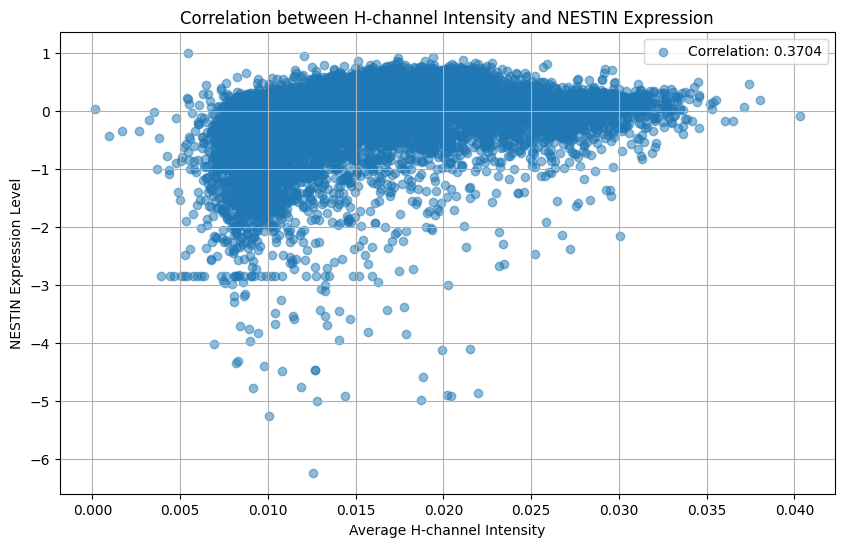

Correlation coefficient: 0.3704


In [14]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
correlation_coeff = df['H_channel_average'].corr(df['NESTIN'])

plt.scatter(df['H_channel_average'], df['NESTIN'], alpha=0.5, label=f'Correlation: {correlation_coeff:.4f}')
plt.xlabel('Average H-channel Intensity')
plt.ylabel('NESTIN Expression Level')
plt.title('Correlation between H-channel Intensity and NESTIN Expression')
plt.grid(True)
plt.legend()
plt.show()
print(f"Correlation coefficient: {correlation_coeff:.4f}")

Q.1.iv Discuss the potential of H-channel average as a predictive feature for NESTIN expression.

- A correlation coefficient of 0.3796 suggests a moderate, positive linear relationship between the average H-channel intensity and NESTIN expression levels .
- The moderate correlation suggests that H-channel average intensity holds some predictive power for NESTIN expression. But as a single predictive feature, it might not be sufficient for precise predictions due to the moderate correlation strength.
- When developing predictive models for NESTIN expression, including H-channel average intensity as one of the features could improve the model's performance.

1.v. Discuss suitable performance metrics for predicting protein expression from images. Identify the most appropriate metric for this specific problem and justify your choice.
- R² and RMSE. Because they provide a clear indication of how well the model can explain the variation in the data and the magnitude of error.

# Question 2

---



# i


- I take A1_0x40.png as an example to calcuate the average and variance for each of the 'H' (from HED), red, green, and blue channels and GLCM.
- But the code in ii calcuate these features for each image.


In [15]:
import numpy as np
from skimage.color import rgb2hed, rgba2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import os
import skimage
example_image_path = image_folder+'/A1_0x40.png'
I = rgba2rgb(imread(example_image_path)) #read sample RGB image
I_hed =  rgb2hed(I) #convert to HED

I_h = I_hed[:,:,0]; I_e = I_hed[:,:,1]; I_d = I_hed[:,:,2];

# Calculate average and variance for HED channels
avg_h = np.mean(I_h); var_h = np.var(I_h)
avg_e = np.mean(I_e); var_e = np.var(I_e)
avg_d = np.mean(I_d); var_d = np.var(I_d)

# Calculate average and variance for RGB channels
avg_r = np.mean(I[:, :, 0]); var_r = np.var(I[:, :, 0])
avg_g = np.mean(I[:, :, 1]); var_g = np.var(I[:, :, 1])
avg_b = np.mean(I[:, :, 2]); var_b = np.var(I[:, :, 2])

print(f"H channel - Avg: {avg_h:.4f}, Var: {var_h:.4f}");print(f"E channel - Avg: {avg_e:.4f}, Var: {var_e:.4f}")
print(f"D channel - Avg: {avg_d:.4f}, Var: {var_d:.4f}");print(f"R channel - Avg: {avg_r:.4f}, Var: {var_r:.4f}")
print(f"G channel - Avg: {avg_g:.4f}, Var: {var_g:.4f}");print(f"B channel - Avg: {avg_b:.4f}, Var: {var_b:.4f}")

H channel - Avg: 0.0135, Var: 0.0004
E channel - Avg: 0.0147, Var: 0.0004
D channel - Avg: 0.0131, Var: 0.0002
R channel - Avg: 0.8489, Var: 0.0159
G channel - Avg: 0.7113, Var: 0.0474
B channel - Avg: 0.8237, Var: 0.0208


In [16]:
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
import numpy as np

I_gray = rgb2gray(I)  # Convert to grayscale
I_gray = (I_gray * 255).astype(np.uint8)  # Convert to uint8

# Compute GLCM
distances = [1]  # Distance between pixel pairs
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # 0, 45, 90, 135 degrees
glcm = graycomatrix(I_gray, distances, angles, 256, symmetric=True, normed=True)

# Compute texture features from GLCM
contrast = graycoprops(glcm, 'contrast')
dissimilarity = graycoprops(glcm, 'dissimilarity')
homogeneity = graycoprops(glcm, 'homogeneity')
energy = graycoprops(glcm, 'energy')
correlation = graycoprops(glcm, 'correlation')
ASM = graycoprops(glcm, 'ASM')  # Angular Second Moment

# print the contrast for all directions
print(f"Contrast: {contrast}")


Contrast: [[182.3600337  316.73101115 212.12630208 401.78028451]]


In [17]:
df['image_id'] = df.VisSpot.apply(lambda x: x.split('-')[2]) + '_' + df.id.astype(str)
print(df.head())  # Check the first few rows to ensure the column exists


          Unnamed: 0                VisSpot  Location_Center_Y  \
image_id                                                         
A1_0x40          412  AAGTAAGCTTCCAAAC-1-A1         764.003658   
A1_0x42         7325  GTTTGAGCGGTTATGT-1-A1         799.511111   
A1_0x44         8102  TCACTCAGCGCATTAG-1-A1         832.902467   
A1_0x46         7085  GTGCGCTTACAAATGA-1-A1         858.343544   
A1_0x48         3748  CGAAGACTGCCCGGGA-1-A1         892.179831   

          Location_Center_X      SMAa     CD11b      CD44      CD31      CDK4  \
image_id                                                                        
A1_0x40          247.700528 -2.895476 -1.445686 -1.875972 -3.456108  0.461409   
A1_0x42          184.389514 -2.895476 -1.198798 -2.070174 -3.456108 -0.002521   
A1_0x44          109.598681 -2.895476 -1.631987 -1.920100 -3.456108  0.549366   
A1_0x46           42.981582 -2.895476 -1.922144 -1.941790 -3.456108  0.639180   
A1_0x48          958.319117 -2.895476 -0.579756 -2.

# Q.2.I.2


# ii

- Here, I extract GLMC features and the average and variance for each of the 'H' (from HED), red, green, and blue channels from each image.
- I  also import ProcessPoolExecutor from concurrent.futures to speed up the precess.


In [18]:
from skimage.io import imread
from skimage.color import rgb2hed, rgba2rgb, rgb2gray
from skimage.feature import graycomatrix, graycoprops
from skimage import img_as_ubyte
import numpy as np

def extract_features(image_path):
    image = imread(image_path)
    if image.shape[-1] == 4:  # Convert RGBA to RGB if necessary
        image = rgba2rgb(image)

    I_hed = rgb2hed(image)  # Convert to HED
    avg_h = np.mean(I_hed[:, :, 0])
    var_h = np.var(I_hed[:, :, 0])

    avg_r, var_r = np.mean(image[:, :, 0]), np.var(image[:, :, 0])
    avg_g, var_g = np.mean(image[:, :, 1]), np.var(image[:, :, 1])
    avg_b, var_b = np.mean(image[:, :, 2]), np.var(image[:, :, 2])

    gray_image = rgb2gray(image)  # Convert to grayscale for GLCM
    gray_image = img_as_ubyte(gray_image)  # Ensure image is in uint8 format
    glcm = graycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

    # Extract several GLCM features
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    ASM = graycoprops(glcm, 'ASM')[0, 0]

    return [avg_h, var_h, avg_r, var_r, avg_g, var_g, avg_b, var_b, contrast, correlation, dissimilarity, homogeneity, energy, ASM]


In [19]:
from concurrent.futures import ProcessPoolExecutor
import os
import pandas as pd

def process_images_in_parallel(image_paths):
    with ProcessPoolExecutor() as executor:
        features = list(executor.map(extract_features, image_paths))
    return features
# only have A1,B1,D1
image_paths_filtered = [os.path.join(image_folder, f"{index}.png") for index, _ in filtered_df.iterrows()]

# only have C1
image_paths_C1 = [os.path.join(image_folder, f"{index}.png") for index, _ in filtered_df_C1.iterrows()]

# Extract features in parallel
features_filtered = process_images_in_parallel(image_paths_filtered)
features_C1  = process_images_in_parallel(image_paths_C1 )

# Convert the features list to a DataFrame
columns = ['avg_h', 'var_h', 'avg_r', 'var_r', 'avg_g', 'var_g', 'avg_b', 'var_b',
    'contrast', 'correlation', 'dissimilarity', 'homogeneity', 'energy', 'ASM']
features_df_filtered = pd.DataFrame(features_filtered, columns=columns)
features_df_C1  = pd.DataFrame(features_C1 , columns=columns)
features_df_combined = pd.concat([features_df_filtered, features_df_C1], ignore_index=True)


- Then I plot the features versus the target variable, and calculate the correlation coefficient.

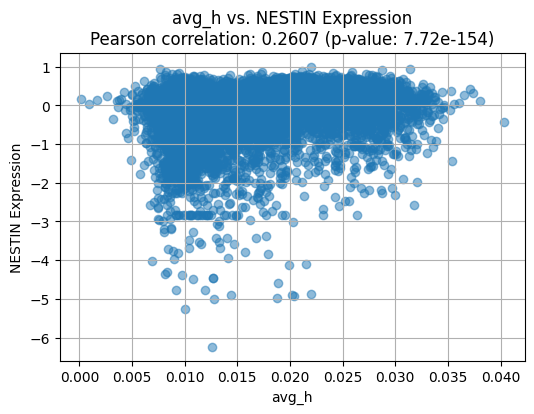

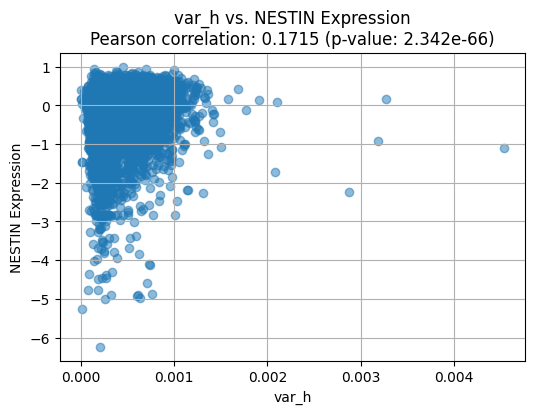

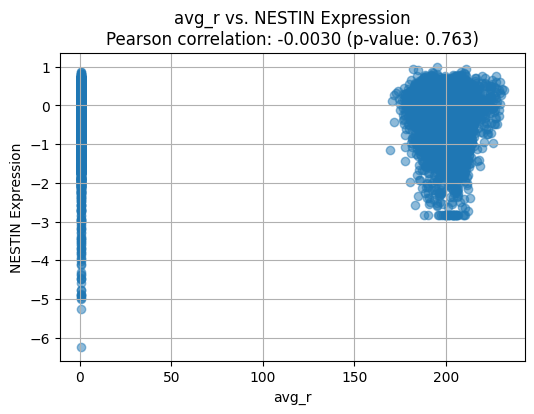

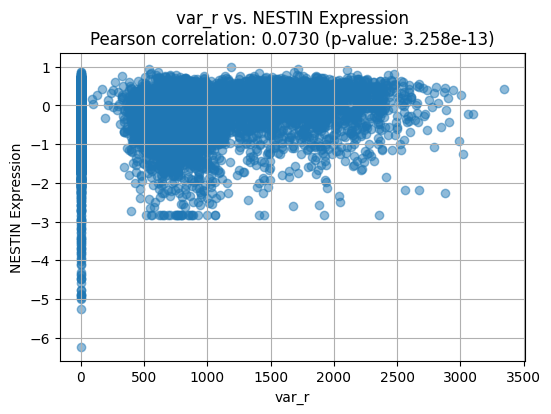

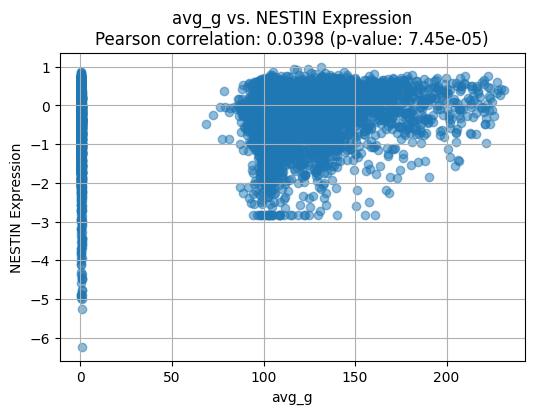

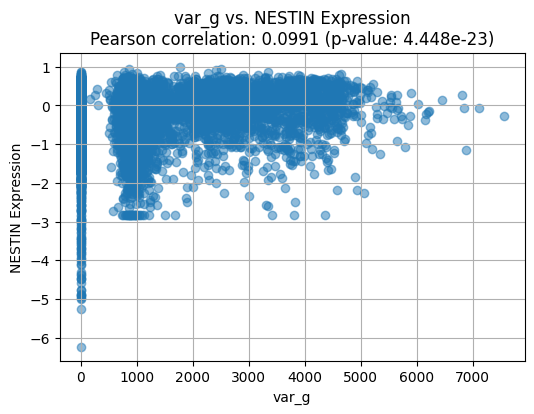

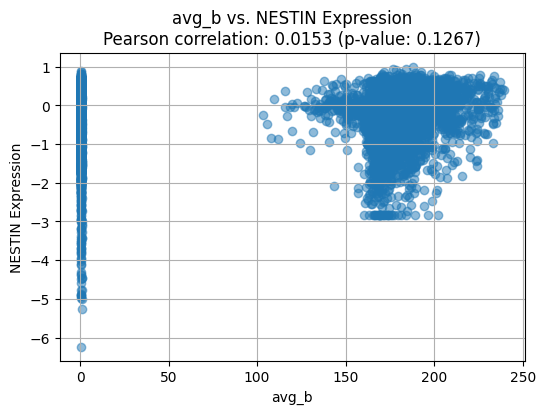

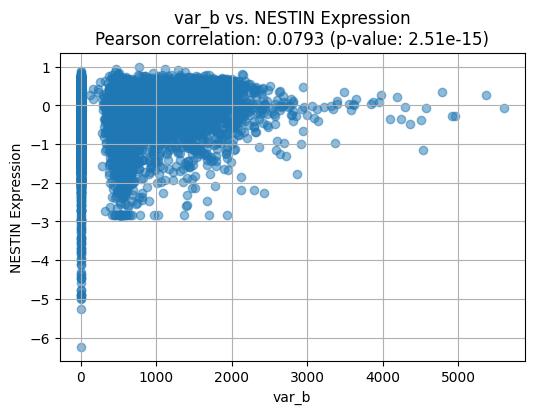

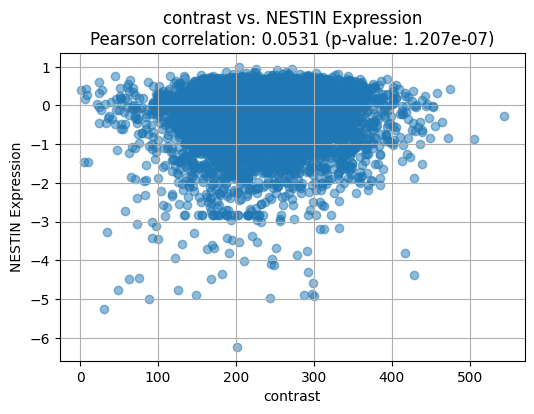

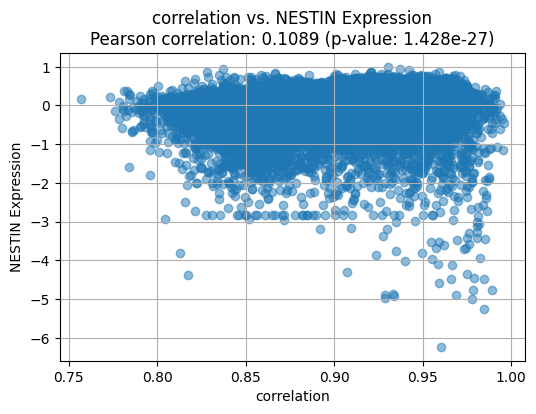

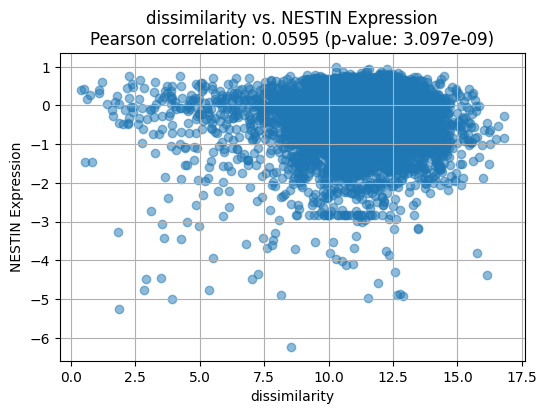

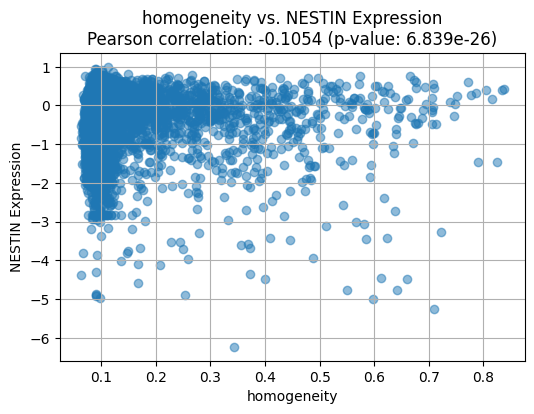

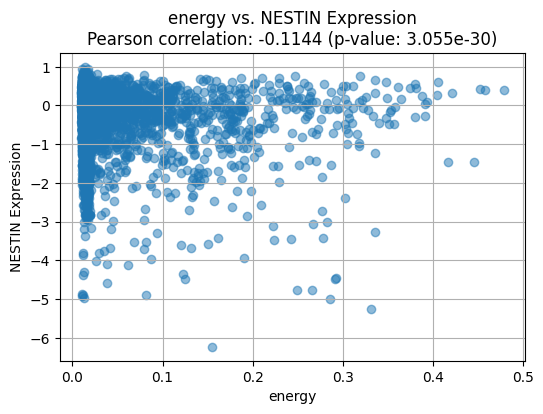

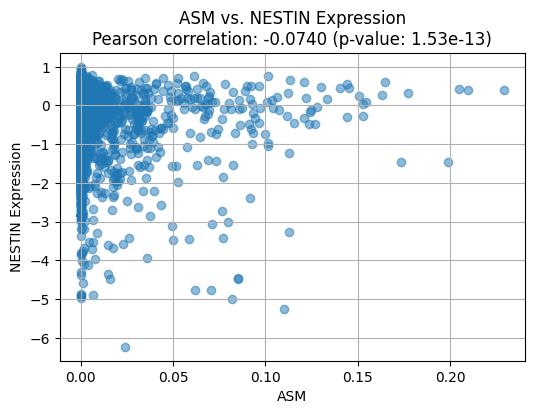

          Feature  Correlation Coefficient        P-value
0           avg_h                 0.260700  7.719771e-154
1           var_h                 0.171497   2.342468e-66
12         energy                -0.114365   3.055244e-30
9     correlation                 0.108926   1.427981e-27
11    homogeneity                -0.105358   6.838651e-26
5           var_g                 0.099095   4.448117e-23
7           var_b                 0.079330   2.510221e-15
13            ASM                -0.074046   1.529861e-13
3           var_r                 0.073034   3.258353e-13
10  dissimilarity                 0.059454   3.097257e-09
8        contrast                 0.053104   1.206584e-07
4           avg_g                 0.039761   7.449908e-05
6           avg_b                 0.015335   1.266876e-01
2           avg_r                -0.003028   7.630111e-01


In [20]:
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
import numpy as np
import matplotlib.pyplot as plt

y = df['NESTIN']
y_aligned = y.reset_index(drop=True)
for feature in features_df_combined.columns:
    # Calculate the Pearson correlation coefficient
    correlation, p_value = pearsonr(features_df_combined[feature], y_aligned)

    # Plotting
    plt.figure(figsize=(6, 4))
    plt.scatter(features_df_combined[feature], y_aligned, alpha=0.5)
    plt.title(f'{feature} vs. NESTIN Expression\nPearson correlation: {correlation:.4f} (p-value: {p_value:.4g})')
    plt.xlabel(feature)
    plt.ylabel('NESTIN Expression')
    plt.grid(True)
    plt.show()
import pandas as pd
from scipy.stats import pearsonr

# Initialize lists to store results
features = []
correlations = []
p_values = []


for feature in features_df_combined.columns:
    # Calculate the Pearson correlation coefficient and p-value
    correlation, p_value = pearsonr(features_df_combined[feature], y_aligned)

    # Append the results
    features.append(feature)
    correlations.append(correlation)
    p_values.append(p_value)

# Create a DataFrame to display the results
correlation_table = pd.DataFrame({
    'Feature': features,
    'Correlation Coefficient': correlations,
    'P-value': p_values
})

# Display the correlation table sorted by the absolute value of the correlation coefficient in descending order
correlation_table = correlation_table.sort_values(by='Correlation Coefficient', key=abs, ascending=False)
print(correlation_table)


- avg_h (average pixel intensity in the Hematoxylin channel) shows the strongest positive correlation with the NESTIN expression. var_h also shows a positive correlation, albeit weaker than avg_h, but still significant.
- energy, homogeneity, and ASM have negative correlations, indicating inverse relationships with the dependent variable, with all being statistically significant but relatively weak.
- correlation, var_g, var_b , var_r , dissimilarity, contrast, avg_g, and avg_bshow positive correlations of varying strengths, all statistically significant but generally weak.

- Here, I use PCA + IPCA. I choose to random select 10% of all the images and extract feature from them. The number of components that caputure 95% of variance is also calcuated. With these features, the model will capture a broader spectrum of the variability in image data.

In [6]:
from skimage.transform import resize
from skimage.io import imread
from skimage.color import rgba2rgb, rgb2gray
from skimage import img_as_ubyte
from sklearn.decomposition import IncrementalPCA
import numpy as np
from sklearn.decomposition import PCA
import random
import os
desired_size = (64, 64)
batch_size = 100
image_paths = [os.path.join(image_folder, f"{index}.png") for index, _ in df.iterrows()]
# Function to read and preprocess an image
def preprocess_image(image_path):
    # Read the image
    image = imread(image_path)

    # If the image has an alpha channel, convert it from RGBA to RGB
    if image.shape[-1] == 4:
        image = rgba2rgb(image)

    # Convert the image to grayscale
    gray_image = rgb2gray(image)

    # Resize the image
    resized_image = resize(gray_image, desired_size, anti_aliasing=True)

    # Convert the resized grayscale image to unsigned byte format
    image_ubyte = img_as_ubyte(resized_image)

    # Flatten the image
    return image_ubyte.flatten()

# Randomly sample a subset of image paths
subset_size = max(1, int(len(image_paths) * 0.1))  # Ensure at least 1 sample is chosen
subset_image_paths = random.sample(image_paths, subset_size)

# Process the subset and filter out any failures
subset_of_images = [preprocess_image(path) for path in subset_image_paths]
subset_of_images = [img for img in subset_of_images if img is not None]

# Check if an empty list exist
if not subset_of_images:
    raise ValueError("The subset of flattened images is empty. Please check  image paths and preprocessing steps.")

# Perform PCA on the subset
pca = PCA(0.95)
pca.fit(subset_of_images)
n_components = pca.n_components_
print(f"Number of components to retain 95% of variance: {n_components}")

ipca = IncrementalPCA(n_components=n_components)
# Process images in batches and fit Incremental PCA
for i in range(0, len(image_paths), batch_size):
    batch_paths = image_paths[i:i + min(batch_size, len(image_paths) - i)]
    batch_images = np.array([preprocess_image(path) for path in batch_paths])

    # Check if the batch is too small for the number of components
    if batch_images.shape[0] < n_components:
        # pad the batch with zeros
        padding = np.zeros((n_components - batch_images.shape[0], batch_images.shape[1]))
        batch_images = np.vstack((batch_images, padding))

    ipca.partial_fit(batch_images)

# Apply the transformation to the images to get the PCA features
# this code extract features from all images
transformed_features = []
for i in range(0, len(image_paths), batch_size):
    batch_paths = image_paths[i:i + batch_size]
    batch_images = [preprocess_image(path) for path in batch_paths]
    transformed_features.append(ipca.transform(batch_images))

# Concatenate all transformed features
transformed_features = np.vstack(transformed_features) # contain c1

Number of components to retain 95% of variance: 556


this code below only extract feature from A1,B1,D1. It is used to develop model without leaking data from C1.

In [9]:
# Apply the transformation to the images to get the PCA features
transformed_features_filtered = []
image_paths_filtered = [os.path.join(image_folder, f"{index}.png") for index, _ in filtered_df.iterrows()]

for i in range(0, len(image_paths_filtered), batch_size):
    batch_paths = image_paths_filtered[i:i + batch_size]
    batch_images = [preprocess_image(path) for path in batch_paths]
    transformed_features_filtered.append(ipca.transform(batch_images))

# Concatenate all transformed features
transformed_features_filtered = np.vstack(transformed_features_filtered )

In [14]:
from scipy.stats import pearsonr

y = df['NESTIN'].values
y_array = np.array(y)

# Determine the number of features in transformed_features
num_features = transformed_features.shape[1]

# Initialize a list to store correlation coefficients
correlation_coefficients = []

# Iterate over each feature
for i in range(num_features):
    # Extract the current feature values
    feature_values = transformed_features[:, i]

    # Calculate the Pearson correlation coefficient
    correlation, _ = pearsonr(feature_values, y_array)

    # Append the correlation coefficient to the list
    correlation_coefficients.append(correlation)

for i, coeff in enumerate(correlation_coefficients):
    print(f"Feature {i}: Pearson correlation coefficient = {coeff:.4f}")


Feature 0: Pearson correlation coefficient = -0.3353
Feature 1: Pearson correlation coefficient = -0.0091
Feature 2: Pearson correlation coefficient = 0.0307
Feature 3: Pearson correlation coefficient = 0.0131
Feature 4: Pearson correlation coefficient = -0.0079
Feature 5: Pearson correlation coefficient = -0.0373
Feature 6: Pearson correlation coefficient = 0.0026
Feature 7: Pearson correlation coefficient = 0.0010
Feature 8: Pearson correlation coefficient = 0.0178
Feature 9: Pearson correlation coefficient = 0.0242
Feature 10: Pearson correlation coefficient = -0.0031
Feature 11: Pearson correlation coefficient = 0.0312
Feature 12: Pearson correlation coefficient = -0.0265
Feature 13: Pearson correlation coefficient = -0.0079
Feature 14: Pearson correlation coefficient = -0.0103
Feature 15: Pearson correlation coefficient = 0.0069
Feature 16: Pearson correlation coefficient = 0.0022
Feature 17: Pearson correlation coefficient = -0.0115
Feature 18: Pearson correlation coefficient = 0

- For PCA feature extraction, I extract over 500 features. It will be impossible to plot. So I only calcuate the correlation coefficient for each feature.
- Among all the features, Feature 0 has a coefficient of -0.3353, which suggests a modest negative linear relationship. This is the strongest correlation among the features listed. It indicates that as Feature 0 increases, the target variable tends to decrease, but the relationship is not very strong.
- Other features show either weak or very weak relationships with the target variable. But I choose to keep them for they are beneficial for models.

- Now, I train the OLS models using 14 eatures. ( the average and variance for each of the 'H' (from HED), red, green, and blue channels; and GMLC extract features 'contrast', 'correlation', 'dissimilarity', 'homogeneity', 'energy', 'ASM')
- I import statsmodels.api cause to add a constant term to the feature set. This constant term acts as the intercept of the regression equation. Without this step, the regression line would be forced to pass through the origin (0, 0), which is not appropriate for most real-world datasets because it assumes that the response variable is zero when all predictors are zero.

                            OLS Regression Results                            
Dep. Variable:                 NESTIN   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     204.9
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:14:53   Log-Likelihood:                -3570.1
No. Observations:                4633   AIC:                             7170.
Df Residuals:                    4618   BIC:                             7267.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.2438      0.730      3.073

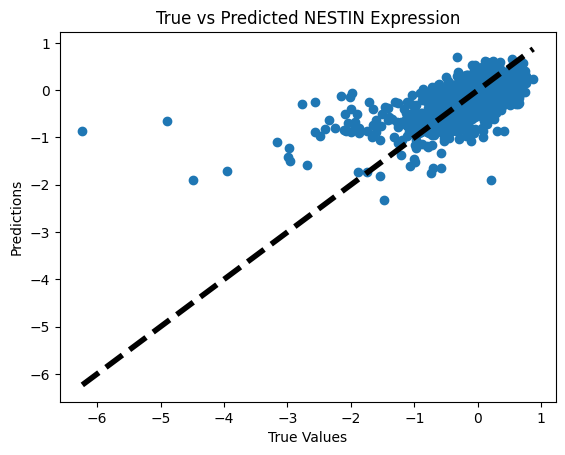

OLS-RMSE: 0.4950
OLS-Pearson Correlation Coefficient: 0.6269
OLS-Spearman Correlation Coefficient: 0.6127
OLS-R^2 Score: 0.3922


In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
import numpy as np
import matplotlib.pyplot as plt

X = features_df_filtered
y = filtered_df['NESTIN']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Reset the indices of both X_train_const and y_train
X_train_const = X_train_const.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Fitting the OLS model
ols_model = sm.OLS(y_train, X_train_const).fit()

# Making predictions on the test set
predictions_ols = ols_model.predict(X_test_const)

# Model summary
print(ols_model.summary())

# Plotting true vs predicted values
plt.scatter(y_test, predictions_ols)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted NESTIN Expression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

rmse = np.sqrt(mean_squared_error(y_test, predictions_ols))
pearson_corr, _ = pearsonr(y_test, predictions_ols)
spearman_corr, _ = spearmanr(y_test, predictions_ols)
r2 = r2_score(y_test, predictions_ols)
print(f"OLS-RMSE: {rmse:.4f}")
print(f"OLS-Pearson Correlation Coefficient: {pearson_corr:.4f}")
print(f"OLS-Spearman Correlation Coefficient: {spearman_corr:.4f}")
print(f"OLS-R^2 Score: {r2:.4f}")


- TThe regular R-squared is 0.383, indicating that approximately 38.3% of the variance in NESTIN expression is explained by the model's predictors.
- The Adjusted R-squared is 0.381, slightly lower than the regular R-squared. This slight decrease suggests that the model is relatively efficient in using its predictors without overly inflating the explanatory power by merely adding more variables.
- Some features, such as var_r, var_g, var_b, and correlation, are not statistically significant, with p-values greater than 0.05. These variables may not contribute meaningful information to the model.

Then I use C1 data to evaluate.

                            OLS Regression Results                            
Dep. Variable:                 NESTIN   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     258.8
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:14:53   Log-Likelihood:                -4400.5
No. Observations:                5792   AIC:                             8831.
Df Residuals:                    5777   BIC:                             8931.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.6024      0.651      4.001

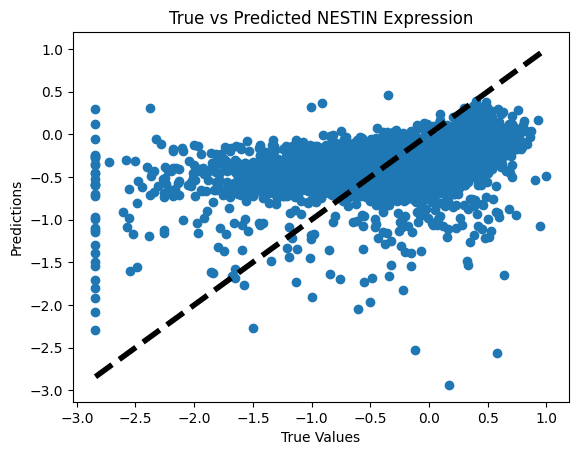

OLS-RMSE-C1: 0.6078
OLS-Pearson Correlation Coefficient-C1: 0.4435
OLS-Spearman Correlation Coefficient-C1: 0.5357
OLS-R^2 Score-C1: 0.1565


In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
import numpy as np
import matplotlib.pyplot as plt


# Directly use the features DataFrames for X_train_val and X_test
X_train_val = features_df_filtered  # Already filtered features for A1, B1, D1
y_train_val = filtered_df ['NESTIN']

X_test = features_df_C1  # Features specifically filtered for C1   4129*14
y_test = filtered_df_C1['NESTIN'] # 4129*1

# Adding a constant term for OLS regression
X_train_val_const = sm.add_constant(X_train_val)
X_test_const = sm.add_constant(X_test)
X_train_val_const = X_train_val_const.reset_index(drop=True)
y_train_val = y_train_val.reset_index(drop=True)
# Fitting the OLS model with training/validation data
ols_model = sm.OLS(y_train_val, X_train_val_const).fit()

# Making predictions on the test set (C1 data)
predictions_ols_C1 = ols_model.predict(X_test_const)

# Model summary
print(ols_model.summary())

# Plotting true vs predicted values
plt.scatter(y_test, predictions_ols_C1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted NESTIN Expression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

rmse = np.sqrt(mean_squared_error(y_test, predictions_ols_C1))
pearson_corr, _ = pearsonr(y_test, predictions_ols_C1)
spearman_corr, _ = spearmanr(y_test, predictions_ols_C1)
r2 = r2_score(y_test, predictions_ols_C1)
print(f"OLS-RMSE-C1: {rmse:.4f}")
print(f"OLS-Pearson Correlation Coefficient-C1: {pearson_corr:.4f}")
print(f"OLS-Spearman Correlation Coefficient-C1: {spearman_corr:.4f}")
print(f"OLS-R^2 Score-C1: {r2:.4f}")


- Above is the result for only using C1 for testing.
- The better performance in the using A1,B1,D1 to train scenario suggests the model is more accurately predicting outcomes when it is tested on the same data it was trained on. This might indicate overfitting to the training data, where the model learns patterns specific to specimens A1, B1, and D1 but struggles to generalize those patterns to unseen data from specimen C1.
- A higher RMSE (the only use C1 to test) indicates that the model's predictions are less accurate on the unseen C1 data compared to the training data.

- Here, I use PCA + IPCA + SVR. First find the best combination of hyperparameters for SVR.

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...svr__C=0.1, svr__epsilon=0.1, svr__kernel=linear; total time= 1.3min
[CV] END ...svr__C=0.1, svr__epsilon=0.1, svr__kernel=linear; total time= 1.1min
[CV] END ...svr__C=0.1, svr__epsilon=0.1, svr__kernel=linear; total time= 1.1min
[CV] END ...svr__C=0.1, svr__epsilon=0.1, svr__kernel=linear; total time= 1.1min
[CV] END ...svr__C=0.1, svr__epsilon=0.1, svr__kernel=linear; total time= 1.1min
[CV] END ......svr__C=0.1, svr__epsilon=0.1, svr__kernel=rbf; total time=   3.9s
[CV] END ......svr__C=0.1, svr__epsilon=0.1, svr__kernel=rbf; total time=   4.8s
[CV] END ......svr__C=0.1, svr__epsilon=0.1, svr__kernel=rbf; total time=   3.9s
[CV] END ......svr__C=0.1, svr__epsilon=0.1, svr__kernel=rbf; total time=   3.8s
[CV] END ......svr__C=0.1, svr__epsilon=0.1, svr__kernel=rbf; total time=   4.9s
[CV] END ..svr__C=0.1, svr__epsilon=0.1, svr__kernel=sigmoid; total time=   3.8s
[CV] END ..svr__C=0.1, svr__epsilon=0.1, svr__ke

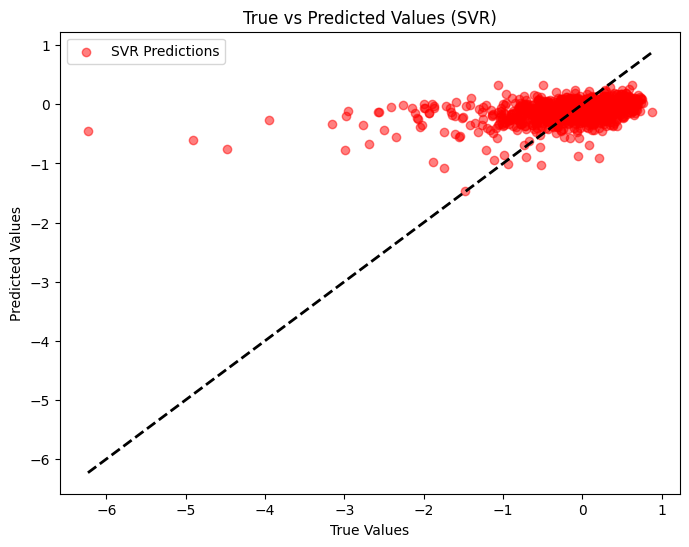

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = transformed_features_filtered
y = filtered_df['NESTIN']
X_train, X_test, y_train, y_test = train_test_split(transformed_features_filtered, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'svr__C': [0.1,0.5],
    'svr__epsilon': [0.1,0.2],
    'svr__kernel': ['linear', 'rbf','sigmoid'],
}

# Create a pipeline that standardizes the data then fits the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Set up the grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# No need to manually scale X_train; the Pipeline takes care of it
grid_search.fit(X_train, y_train)

# Print the best parameters and best score (RMSE)
print("Best Parameters:", grid_search.best_params_)
best_rmse = np.sqrt(-grid_search.best_score_)
print(f"Best RMSE: {best_rmse:.4f}")

# To evaluate on the test set, use the best estimator directly
y_pred = grid_search.predict(X_test)


# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
pearson_corr, _ = pearsonr(y_test, y_pred)
spearman_corr, _ = spearmanr(y_test, y_pred)
print(f"SVR-RMSE: {rmse:.4f}")
print(f"SVR-R^2 Score: {r2:.4f}")
print(f"SVR-Pearson Correlation Coefficient: {pearson_corr:.4f}")
print(f"SVR-Spearman Correlation Coefficient: {spearman_corr:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='r', label='SVR Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (SVR)')
plt.legend()
plt.show()

- Then use the best model to test C1. Best Parameters: {'svr__C': 0.5, 'svr__epsilon': 0.2, 'svr__kernel': 'rbf'}

SVR-RMSE: 0.7394
SVR-R^2 Score: -0.2481
SVR-Pearson Correlation Coefficient: 0.086
SVR-Spearman Correlation Coefficient: 0.1229


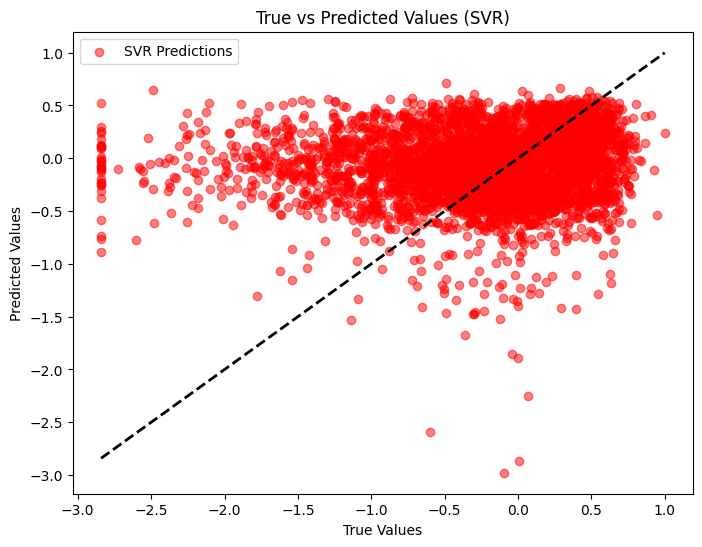

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr


N = len(filtered_df_C1)
X_train = transformed_features
y_train = df['NESTIN']
X_test = transformed_features[:N]
y_test = filtered_df_C1['NESTIN']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model with the best parameters
svr = SVR(C=0.5, epsilon=0.1,kernel= 'rbf')
svr.fit(X_train_scaled, y_train)

# Make predictions on the testing set (C1)
y_pred = svr.predict(X_test_scaled)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"SVR-RMSE: {rmse:.4}")
print(f"SVR-R^2 Score: {r2:.4}")

# Calculate correlation coefficients
pearson_corr, _ = pearsonr(y_test, y_pred)
spearman_corr, _ = spearmanr(y_test, y_pred)
print(f"SVR-Pearson Correlation Coefficient: {pearson_corr:.4}")
print(f"SVR-Spearman Correlation Coefficient: {spearman_corr:.4}")

# Plot true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='r', label='SVR Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (SVR)')
plt.legend()
plt.show()


- By comparing the results, the OLS model with 14 features perform better than SVR. It has demonstrated superior performance in all the metrics: lower RMSE (indicating higher accuracy), higher R^2 score (better model fit), and higher Pearson and Spearman correlation coefficients (stronger linear and monotonic relationships between the predicted and actual values).


# Question 3

# i cnn

In [ ]:
import pandas as pd

# Convert 'NESTIN' to numeric, forcing non-convertible values to NaN
df['NESTIN'] = pd.to_numeric(df['NESTIN'], errors='coerce')

# Filter for rows with a numeric NESTIN value (valid NESTIN value)
df_with_valid_nestin = df[df['NESTIN'].notnull()]

# Further filter df to include only specimens A1, B1, D1, while keeping 'image_id' as the index
filtered_df = df_with_valid_nestin[df_with_valid_nestin['specimen_id'].isin(['A1', 'B1', 'D1'])]

# Verify the structure of filtered_df
#print(filtered_df.head())
#print(filtered_df.index.name)


In [ ]:
def create_image_path(image_id):
    base_path = '/content/drive/MyDrive/data mining lab/assignment 2/patches_256/'
    return f"{base_path}{image_id}.png"

# Apply this function to the DataFrame's index to create the new column
filtered_df['image_paths_filtered'] = filtered_df.index.map(create_image_path)

# Print the new DataFrame to verify the result
print(filtered_df[['image_paths_filtered']].head())

                                       image_paths_filtered
image_id                                                   
A1_0x40   /content/drive/MyDrive/data mining lab/assignm...
A1_0x42   /content/drive/MyDrive/data mining lab/assignm...
A1_0x44   /content/drive/MyDrive/data mining lab/assignm...
A1_0x46   /content/drive/MyDrive/data mining lab/assignm...
A1_0x48   /content/drive/MyDrive/data mining lab/assignm...


<ipython-input-4-464c7d84db27>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['image_paths_filtered'] = filtered_df.index.map(create_image_path)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NestinCNN(nn.Module):
    def __init__(self):
        super(NestinCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)  # grayscale images
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 256)
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
class NestinDataset(Dataset):
    def __init__(self, image_paths, nestin_values, base_path, transform=None):
        self.image_paths = image_paths
        self.nestin_values = nestin_values
        self.base_path = base_path
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        nestin_value = torch.tensor([self.nestin_values[idx]], dtype=torch.float)

        if self.transform:
            image = self.transform(image)

        return image, nestin_value

image_paths_filtered = filtered_df['image_paths_filtered'].tolist()
nestin_values = filtered_df['NESTIN'].tolist()

X_train_paths, X_test_paths, y_train, y_test = train_test_split(
    image_paths_filtered, nestin_values, test_size=0.2, random_state=42)

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

base_path = '/content/drive/MyDrive/data mining lab/assignment 2/patches_256/'
train_dataset = NestinDataset(X_train_paths, y_train, base_path, transform=transform)
test_dataset = NestinDataset(X_test_paths, y_test, base_path, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)


Epoch 1, Loss: 0.41472145995337933
Epoch 2, Loss: 0.3590191187112239
Epoch 3, Loss: 0.3044707274803057
Epoch 4, Loss: 0.2402576492537327
Epoch 5, Loss: 0.16546726150855678
Epoch 6, Loss: 0.09665647349079493
Epoch 7, Loss: 0.056747448109572045


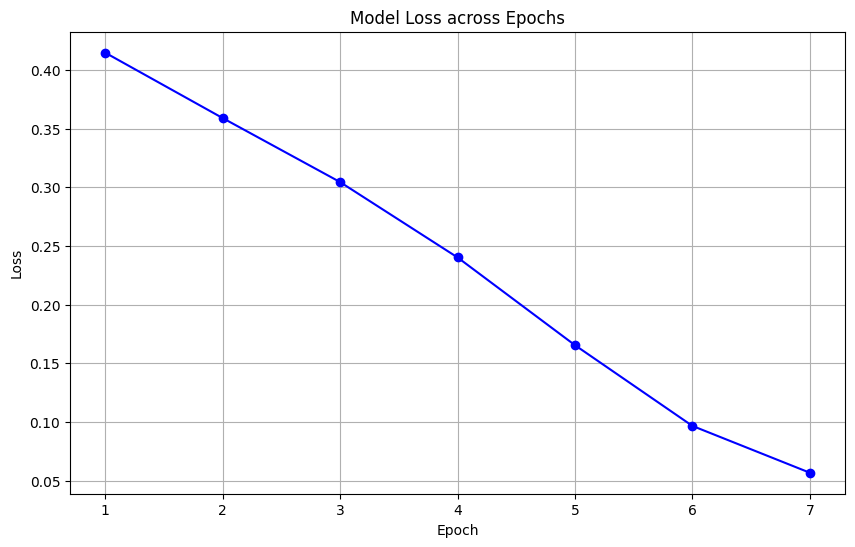

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NestinCNN().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 7
loss_values = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, nestin_values in train_loader:
        images = images.to(device)
        nestin_values = nestin_values.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, nestin_values)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    loss_values.append(epoch_loss)
    print(f'Epoch {epoch+1}, Loss: {epoch_loss}')

# Plotting the convergence plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='b')
plt.title('Model Loss across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


RMSE: 0.5219705104827881
Pearson Correlation Coefficient: 0.5720771510654935
Spearman Correlation Coefficient: 0.5826224698520394
R2 Score: 0.3240904785749764


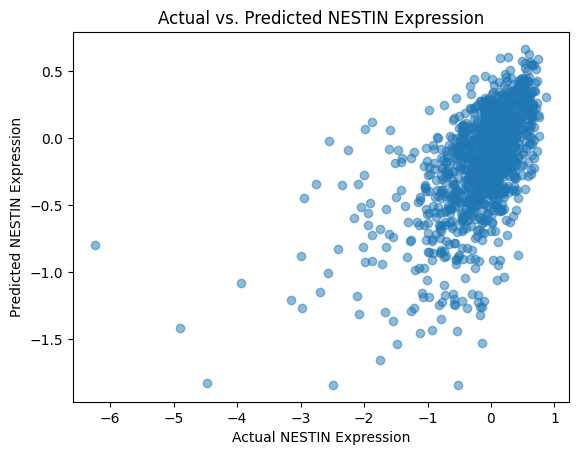

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
import numpy as np
import matplotlib.pyplot as plt

model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for images, nestin_values in test_loader:
        images = images.to(device)
        outputs = model(images)
        predictions.extend(outputs.cpu().numpy())
        actuals.extend(nestin_values.numpy())

predictions = np.array(predictions).flatten()
actuals = np.array(actuals).flatten()

# Calculate metrics
rmse = np.sqrt(mean_squared_error(actuals, predictions))
pearson_corr, _ = pearsonr(actuals, predictions)
spearman_corr, _ = spearmanr(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f'RMSE: {rmse}')
print(f'Pearson Correlation Coefficient: {pearson_corr}')
print(f'Spearman Correlation Coefficient: {spearman_corr}')
print(f'R2 Score: {r2}')

# Scatter plot
plt.scatter(actuals, predictions, alpha=0.5)
plt.xlabel('Actual NESTIN Expression')
plt.ylabel('Predicted NESTIN Expression')
plt.title('Actual vs. Predicted NESTIN Expression')
plt.show()


I have used different epoch number to see the result. The code has been deleted as they are all repetitive, but the results have been saved.  The results are as followed:
- epoch =1 but not resize the image, RMSE: 0.5945, Pearson Correlation Coefficient: 0.3759,
Spearman Correlation Coefficient: 0.4148
R2 Score: 0.1231

- epoch = 5 but resize images to 64*64,
RMSE: 0.5726
Pearson Correlation Coefficient: 0.4531
Spearman Correlation Coefficient: 0.5032
R2 Score: 0.1863.

- epoch = 10 also resize images to 64*64,
RMSE: 0.5881, Pearson Correlation Coefficient: 0.5088,
Spearman Correlation Coefficient: 0.5528,
R2 Score: 0.1418.

- epoch=7, also resize. RMSE: 0.5219,
Pearson Correlation Coefficient: 0.5720,
Spearman Correlation Coefficient: 0.5826
R2 Score: 0.3240.
- When the epoch =7, the result is the best.(It takes 50 minutes to train) So I choose 7 epochs.

# test cnn on C1

RMSE for C1: 0.6120151877403259
Pearson Correlation Coefficient for C1: 0.5003308059006614
Spearman Correlation Coefficient for C1: 0.598166687862859
R2 Score for C1: 0.14490955666082628


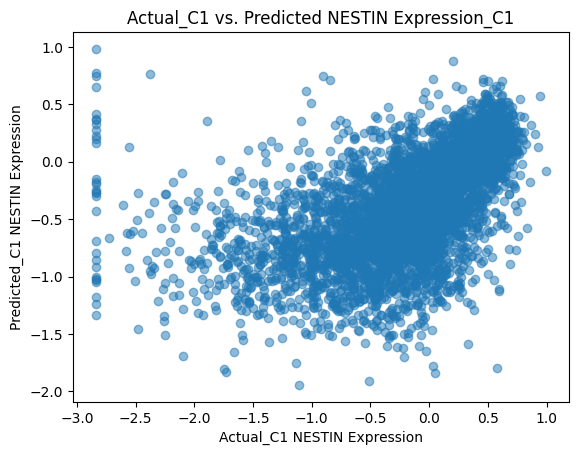

In [ ]:
# Separate the data for the final test (C1)
df_C1 = df_with_valid_nestin[df_with_valid_nestin['specimen_id'].isin(['C1'])].copy()
df_C1['image_paths_filtered'] = df_C1.index.map(create_image_path)

# Prepare the dataset for C1
image_paths_C1 = df_C1['image_paths_filtered'].tolist()
nestin_values_C1 = df_C1['NESTIN'].tolist()

test_dataset_C1 = NestinDataset(image_paths_C1, nestin_values_C1, base_path, transform=transform)
test_loader_C1 = DataLoader(test_dataset_C1, batch_size=8, shuffle=False)

# Test the model on C1
model.eval()
predictions_C1 = []
actuals_C1 = []
with torch.no_grad():
    for images, nestin_values in test_loader_C1:
        images = images.to(device)
        nestin_values = nestin_values.to(device)

        outputs = model(images)
        predictions_C1.extend(outputs.cpu().numpy())
        actuals_C1.extend(nestin_values.cpu().numpy())

predictions_C1 = np.array(predictions_C1).flatten()
actuals_C1 = np.array(actuals_C1).flatten()

# Calculate metrics for C1
rmse_C1 = np.sqrt(mean_squared_error(actuals_C1, predictions_C1))
pearson_corr_C1, _ = pearsonr(actuals_C1, predictions_C1)
spearman_corr_C1, _ = spearmanr(actuals_C1, predictions_C1)
r2_C1 = r2_score(actuals_C1, predictions_C1)

# Print metrics for C1
print(f"RMSE for C1: {rmse_C1}")
print(f"Pearson Correlation Coefficient for C1: {pearson_corr_C1}")
print(f"Spearman Correlation Coefficient for C1: {spearman_corr_C1}")
print(f"R2 Score for C1: {r2_C1}")

# Scatter plot
plt.scatter(actuals_C1, predictions_C1, alpha=0.5)
plt.xlabel('Actual_C1 NESTIN Expression')
plt.ylabel('Predicted_C1 NESTIN Expression')
plt.title('Actual_C1 vs. Predicted NESTIN Expression_C1')
plt.show()

-
- A coefficient of 0.5003 suggests a moderate positive linear relationship between cnn model's predicted values and actual values. It indicates that cnn model captures some of the variability in the data.
- A value of 0.5982 indicates a moderate-to-strong positive monotonic relationship.
-  An R2 score of 0.1449 is relatively low, suggesting that cnn model explains only about 14.49% of the variance in the target variable. This implies that there's a significant amount of variability in the protein expression levels that the model is not capturing.


# ii still cnn

- I use 1000 images from each specimen to make sure each specimen contributes equally to the training process.
- This can prevent the model from becoming biased toward the specimen with the most images and save training time.

In [ ]:
import pandas as pd

proteins = ['EGFR', 'PTEN', 'NESTIN', 'SOX2', 'MET']
#specimens = filtered5_df['specimen_id'].unique()

columns_to_keep = [ 'EGFR', 'PTEN', 'NESTIN', 'SOX2', 'MET', 'id', 'specimen_id']
filtered5_df = df[columns_to_keep]
temp_df = pd.DataFrame()
specimens = ['A1', 'B1', 'C1', 'D1']

# Loop through each specimen and get the first 1000 rows for each
for specimen in specimens:
    specimen_rows = filtered5_df[filtered5_df['specimen_id']== specimen].head(1000)
    temp_df = pd.concat([temp_df, specimen_rows], axis=0)

# Assign the concatenated result back to filtered5_df
filtered5_df = temp_df
protein_values = filtered5_df[['EGFR', 'PTEN', 'NESTIN', 'SOX2', 'MET']].values.tolist()
#print(filtered5_df)
#filtered5_df = filtered5_df[filtered5_df['specimen_id'].isin(['A1', 'B1', 'D1'])]

def create_image_path(image_id):
    base_path = '/content/drive/MyDrive/data mining lab/assignment 2/patches_256/'
    return f"{base_path}{image_id}.png"

# Apply this function to the DataFrame's index to create the new column
filtered5_df['image_paths_filtered'] = filtered5_df.index.map(create_image_path)
image_paths_array = filtered5_df['image_paths_filtered'].to_numpy()
# Print the new DataFrame to verify the result
print(filtered5_df[['image_paths_filtered']].head())


                                       image_paths_filtered
image_id                                                   
A1_0x40   /content/drive/MyDrive/data mining lab/assignm...
A1_0x42   /content/drive/MyDrive/data mining lab/assignm...
A1_0x44   /content/drive/MyDrive/data mining lab/assignm...
A1_0x46   /content/drive/MyDrive/data mining lab/assignm...
A1_0x48   /content/drive/MyDrive/data mining lab/assignm...


In [ ]:
import pandas as pd
from sklearn.model_selection import LeaveOneGroupOut
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

class MultiOutputCNN(nn.Module):
    def __init__(self):
        super(MultiOutputCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)  # grayscale images
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 256)
        self.fc2 = nn.Linear(256, 5)  # Adjusted for 5 output units

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class MultiLabelDataset(Dataset):
    def __init__(self, image_paths, labels,  transform=None):
        # labels should now be a list of tensors or arrays with shape [5]
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
            return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('L')
        label = torch.tensor(self.labels[idx], dtype=torch.float)
        if self.transform:
            image = self.transform(image)
        return image, label

In [ ]:
import numpy as np
from sklearn.model_selection import GroupKFold
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import LeaveOneGroupOut
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
from math import sqrt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logo = LeaveOneGroupOut()
fold = 0
groups = filtered5_df['specimen_id'].tolist()
all_rmse, all_pearson, all_spearman, all_r2 = [], [], [], []

# Convert protein_values to a tensor once, appropriately
if not isinstance(protein_values, torch.Tensor):
    protein_values_tensor = torch.tensor(protein_values, dtype=torch.float32).to(device)
else:
    protein_values_tensor = protein_values.to(device)

def extract_ids_from_path(path):
    # Extract the filename without extension
    filename = path.split('/')[-1].split('.')[0]
    # The entire filename can serve as the image_id
    image_id = filename
    # The specimen_id is the first part of the filename before the underscore
    specimen_id = filename.split('_')[0]
    return image_id, specimen_id


In [ ]:
def get_expression_values(protein, specimen, filtered5_df, predictions_df):
    # Filter the actual and predicted dataframes for the given specimen
    actual_subset = filtered5_df[filtered5_df['specimen_id'] == specimen]
    predicted_subset = predictions_df[predictions_df['specimen_id'] == specimen]

    # Extract expression values
    actual_expression = actual_subset[protein].values
    predicted_expression = predicted_subset[protein].values

    return actual_expression, predicted_expression


Training on fold 1...


<ipython-input-28-fdad82ab7af0>:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(self.labels[idx], dtype=torch.float)


Epoch 1, Loss: 0.5451859157284101
Epoch 2, Loss: 0.4373386743068695
Epoch 3, Loss: 0.3846481093366941
Epoch 4, Loss: 0.33514915880560875
Epoch 5, Loss: 0.26029366663098336
Epoch 6, Loss: 0.20672030865152677
Epoch 7, Loss: 0.1512033671637376


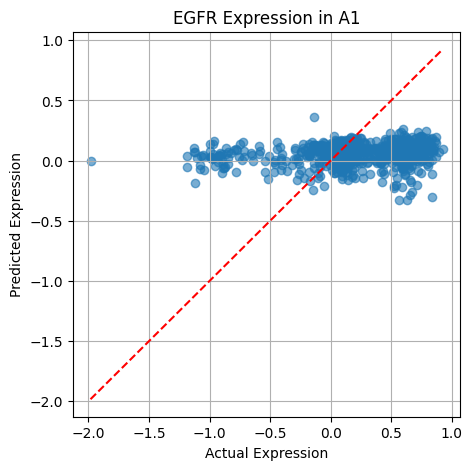

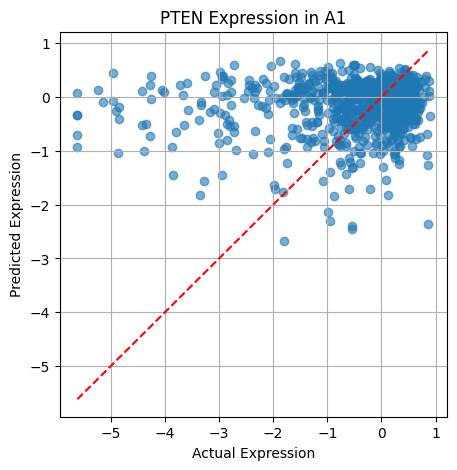

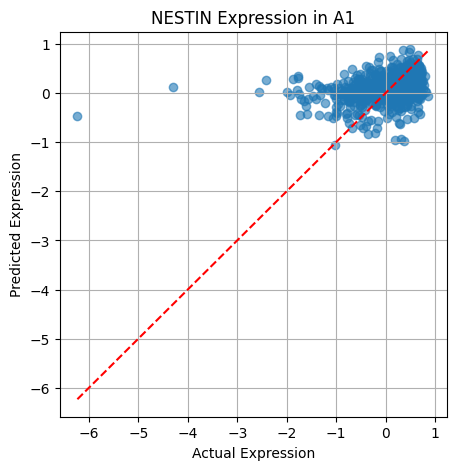

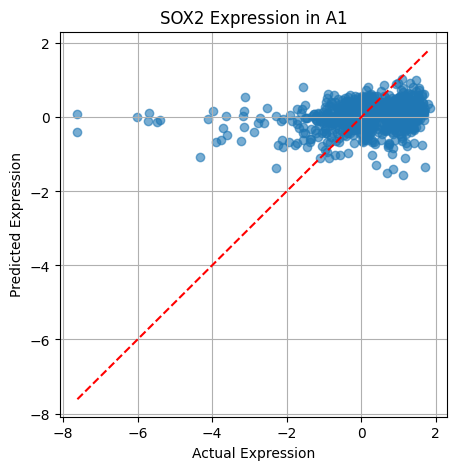

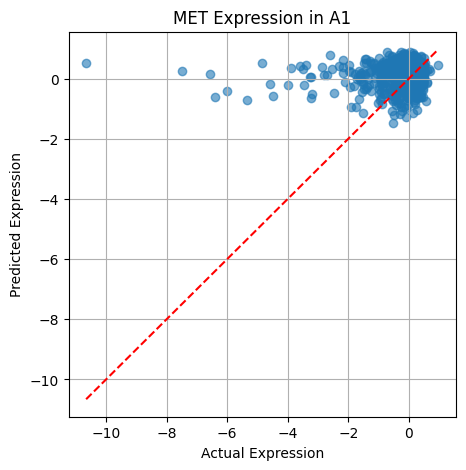

Training on fold 2...


<ipython-input-28-fdad82ab7af0>:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(self.labels[idx], dtype=torch.float)


Epoch 1, Loss: 0.6473861384987831
Epoch 2, Loss: 0.5400913166999817
Epoch 3, Loss: 0.5091478528678417
Epoch 4, Loss: 0.43908500669399897
Epoch 5, Loss: 0.3701713687578837
Epoch 6, Loss: 0.27154442010323204
Epoch 7, Loss: 0.1992994053463141


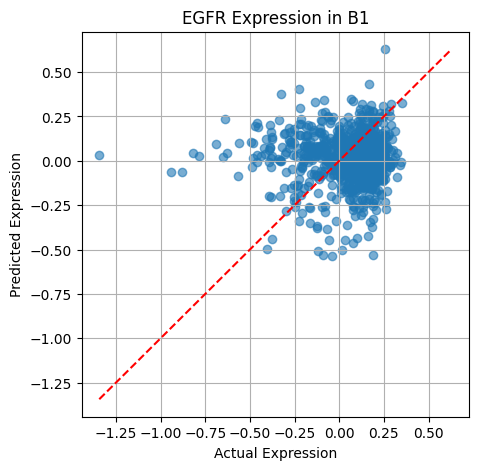

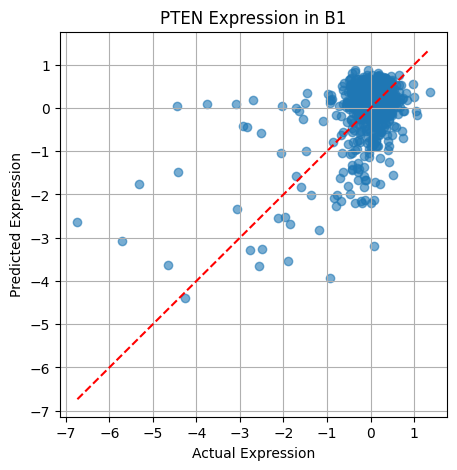

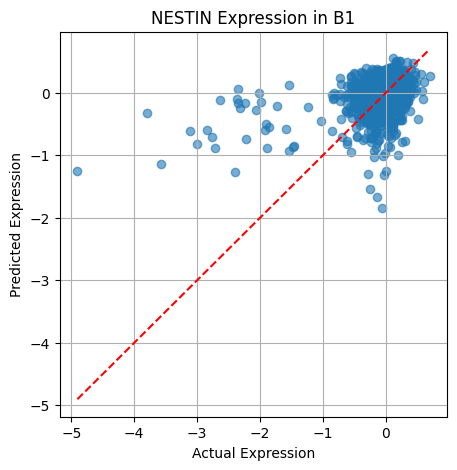

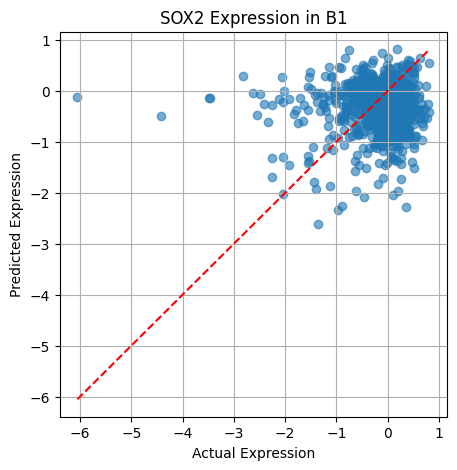

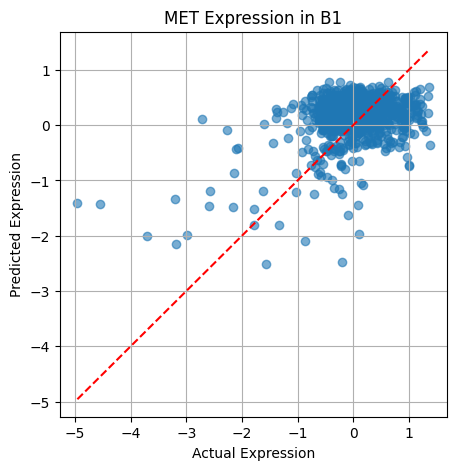

Training on fold 3...


<ipython-input-28-fdad82ab7af0>:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(self.labels[idx], dtype=torch.float)


Epoch 1, Loss: 0.5313830024103323
Epoch 2, Loss: 0.4091193803946177
Epoch 3, Loss: 0.3662145976622899
Epoch 4, Loss: 0.3052265947461128
Epoch 5, Loss: 0.2316740654706955
Epoch 6, Loss: 0.17372455794612568
Epoch 7, Loss: 0.13198715219895044


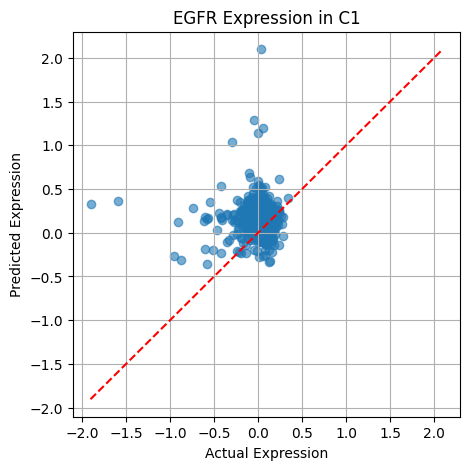

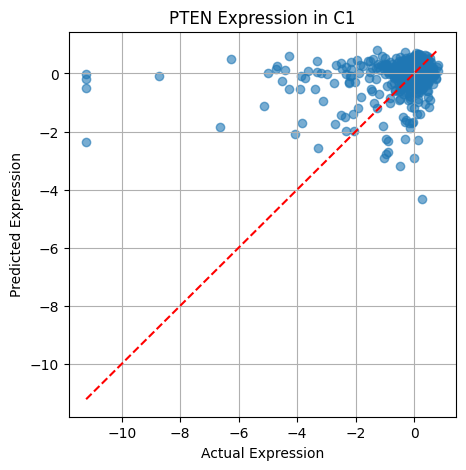

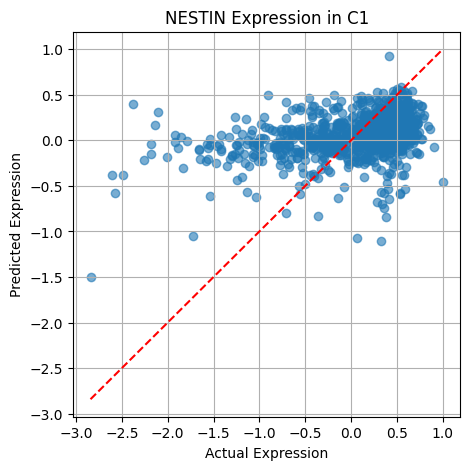

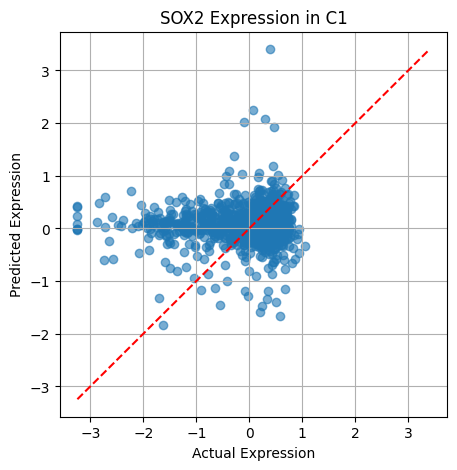

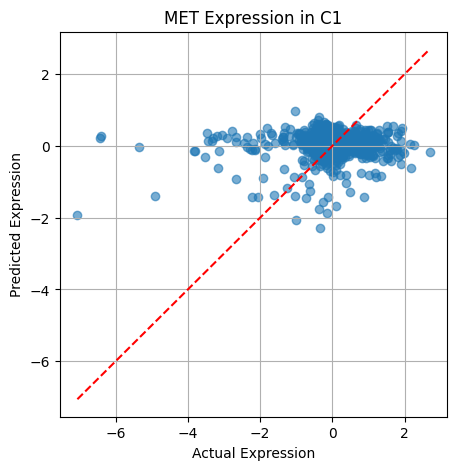

Training on fold 4...


<ipython-input-28-fdad82ab7af0>:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(self.labels[idx], dtype=torch.float)


Epoch 1, Loss: 0.5427175551255544
Epoch 2, Loss: 0.4714828630288442
Epoch 3, Loss: 0.41773980502287544
Epoch 4, Loss: 0.3339063587586085
Epoch 5, Loss: 0.26214291402697565
Epoch 6, Loss: 0.1981420090297858
Epoch 7, Loss: 0.16088042142490547


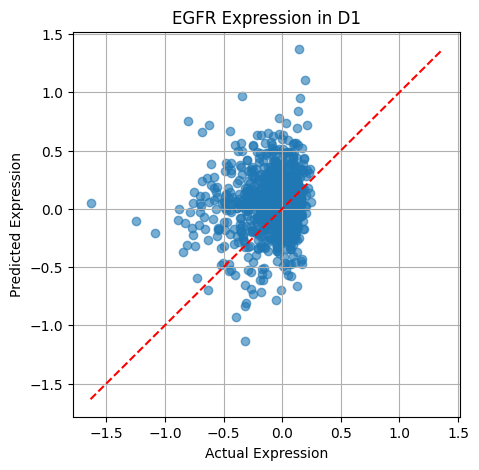

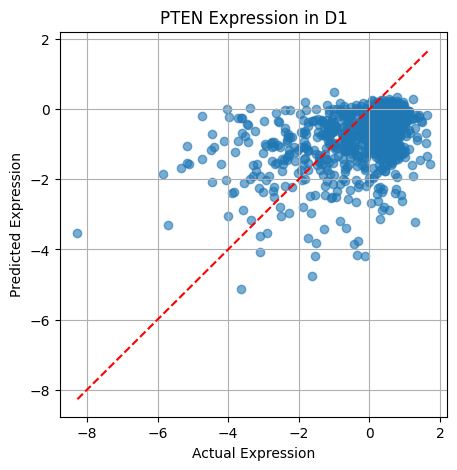

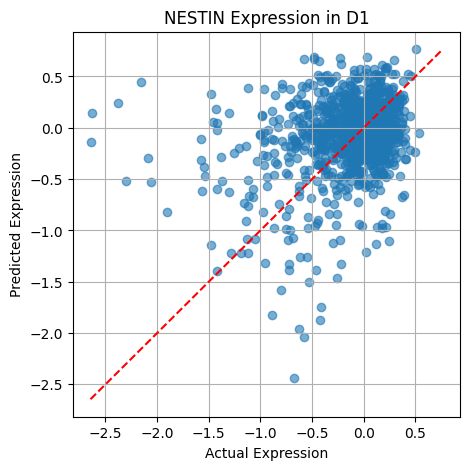

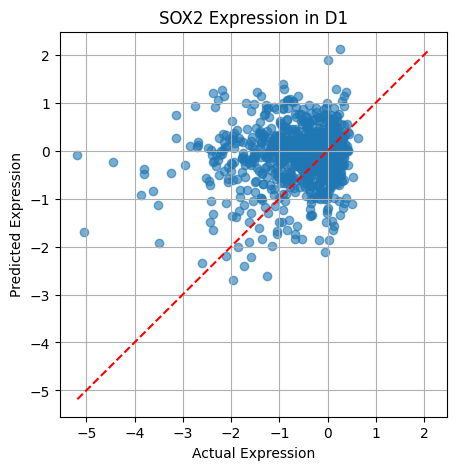

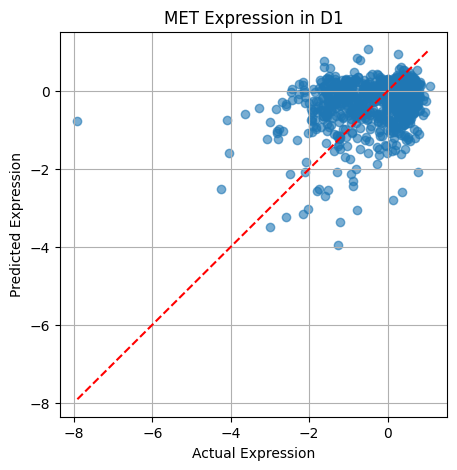

-----------------------------------------------------------------
mean RMSE for 5 proteins: 0.7820416761091029
mean Pearson Correlation Coefficient for 5 proteins: 0.23900771501502027
mean Spearman Correlation Coefficient for 5 proteins: 0.1138264476452214
mean R2 Score for 5 proteins: -0.3360337052647315
-----------------------------------------------------------------
std RMSE for 5 proteins: 0.12160370309064902
std Pearson Correlation Coefficient for 5 proteins: 0.05684001604456742
std Spearman Correlation Coefficient for 5 proteins: 0.03360817332857538
std R2 Score for 5 proteins: 0.1835686446610149


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

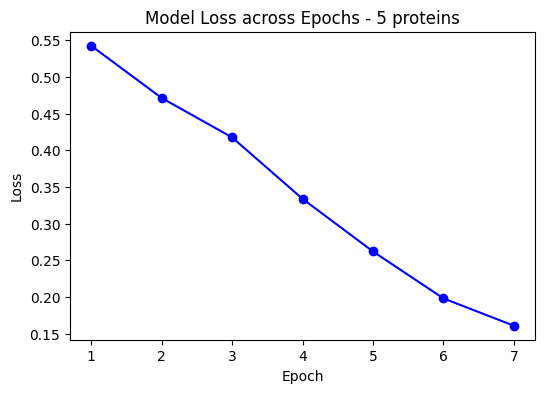

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
all_rmse = []
all_pearson = []
all_spearman = []
all_r2 = []
fold = 0

for train_index, test_index in logo.split(image_paths_array, np.array(protein_values), groups):
    fold += 1
    print(f"Training on fold {fold}...")
    X_train_paths = [filtered5_df.iloc[i]['image_paths_filtered'] for i in train_index]
    X_test_paths = [filtered5_df.iloc[i]['image_paths_filtered'] for i in test_index]

    y_train = protein_values_tensor[train_index]
    y_test = protein_values_tensor[test_index]

    train_dataset = MultiLabelDataset(X_train_paths, y_train, transform=transform)
    test_dataset = MultiLabelDataset(X_test_paths, y_test, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

    # Model re-initialization for each fold
    model = MultiOutputCNN().to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # Training loop
    num_epochs = 7
    loss_values = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, protein_values in train_loader:
            images = images.to(device)
            protein_values = protein_values.clone().detach().to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, protein_values)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        loss_values.append(epoch_loss)
        print(f'Epoch {epoch+1}, Loss: {epoch_loss}')

    # Evaluation
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for images, protein_values in test_loader:
            images = images.to(device)
            outputs = model(images)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(protein_values.cpu().numpy())

    predictions = np.array(predictions)
    actuals = np.array(actuals)

    # Extract image_ids and specimen_ids from X_test_paths
    image_ids, specimen_ids = zip(*[extract_ids_from_path(path) for path in X_test_paths])

    # Create a DataFrame for the predictions of the current fold
    predictions_df = pd.DataFrame(predictions, columns=['EGFR', 'PTEN', 'NESTIN', 'SOX2', 'MET'])
    predictions_df['image_id'] = image_ids
    predictions_df['specimen_id'] = specimen_ids

    predictions = np.array(predictions)
    actuals = np.array(actuals)

    if len(actuals) != len(predictions):
        print(f"Length mismatch - Actual: {len(actuals)}, Predicted: {len(predictions)}")
    else:

          # loop through each specimen and protein to plot actual vs predicted values
          for specimen in specimens:
              for protein in proteins:
                  actual_expression, predicted_expression = get_expression_values(protein, specimen, filtered5_df, predictions_df)

                  # Check if either array is empty before proceeding
                  if actual_expression.size == 0 or predicted_expression.size == 0:
                      #print(f"Skipping {protein} in {specimen} due to missing data.")
                      continue  # Skip to the next iteration if either is empty

                  # Filter null or invalid values before plotting or analysis
                  valid_mask = ~np.isnan(actual_expression) & ~np.isnan(predicted_expression)
                  filtered_actual_expression = actual_expression[valid_mask]
                  filtered_predicted_expression = predicted_expression[valid_mask]


                  if len(actual_expression) > 0 and len(predicted_expression) > 0:
                      plt.figure(figsize=(5, 5))
                      plt.scatter(actual_expression, predicted_expression, alpha=0.6)
                      plt.title(f'{protein} Expression in {specimen}')
                      plt.xlabel('Actual Expression')
                      plt.ylabel('Predicted Expression')
                      min_val = min(np.min(actual_expression), np.min(predicted_expression))
                      max_val = max(np.max(actual_expression), np.max(predicted_expression))
                      plt.plot([min_val, max_val], [min_val, max_val], 'r--')  # Line of perfect prediction
                      plt.grid(True)
                      plt.show()
                  else:
                      print(f"No data for {protein} in {specimen}")

    rmse = sqrt(mean_squared_error(actuals, predictions))
    pearson_corr, _ = pearsonr(actuals.flatten(), predictions.flatten())
    spearman_corr, _ = spearmanr(actuals.flatten(), predictions.flatten())
    r2 = r2_score(actuals, predictions)

    all_rmse.append(rmse)
    all_pearson.append(pearson_corr)
    all_spearman.append(spearman_corr)
    all_r2.append(r2)

mean_rmse = np.mean(all_rmse)
mean_pearson = np.mean(all_pearson)
mean_spearman = np.mean(all_spearman)
mean_r2 = np.mean(all_r2)

std_rmse = np.std(all_rmse)
std_pearson = np.std(all_pearson)
std_spearman = np.std(all_spearman)
std_r2 = np.std(all_r2)
print('-----------------------------------------------------------------')
print(f"mean RMSE for 5 proteins: {mean_rmse}")
print(f"mean Pearson Correlation Coefficient for 5 proteins: {mean_pearson}")
print(f"mean Spearman Correlation Coefficient for 5 proteins: {mean_spearman}")
print(f"mean R2 Score for 5 proteins: {mean_r2}")
print('-----------------------------------------------------------------')
print(f"std RMSE for 5 proteins: {std_rmse}")
print(f"std Pearson Correlation Coefficient for 5 proteins: {std_pearson}")
print(f"std Spearman Correlation Coefficient for 5 proteins: {std_spearman}")
print(f"std R2 Score for 5 proteins: {std_r2}")

plt.figure(figsize=(6, 4))
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='b')
plt.title('Model Loss across Epochs - 5 proteins')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid


# Final Results

Model cannot capture these differences due to insufficient or non-representative training data, its predictive performance may suffer.

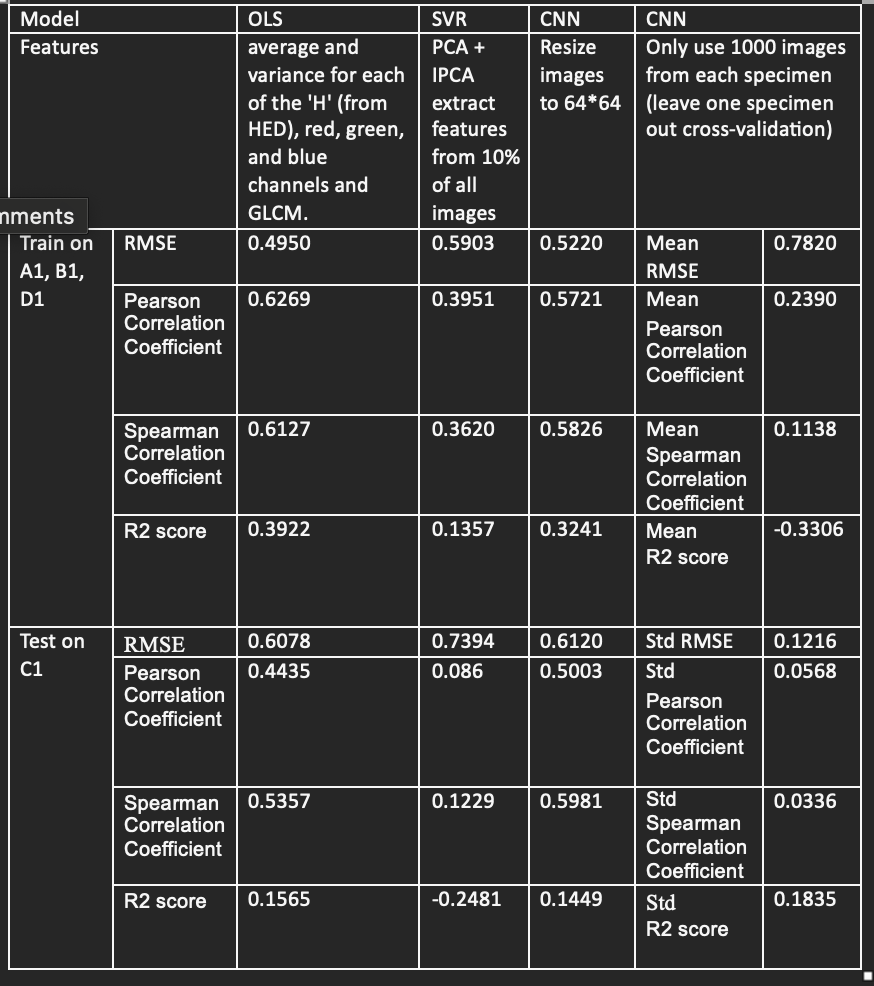

In [13]:
from IPython.display import Image
Image('/content/drive/MyDrive/data mining lab/assignment 2/Screenshot 2024-03-17 at 09.48.51.png')

From the results,
- The CNN model, when trained on A1, B1, and D1 and tested on C1, has the best mean RMSE on the training data (0.5220) compared to OLS (0.4950) and SVR (0.5903). However, it doesn't perform as well on the test data with a higher RMSE of 0.6120.
- The Spearman Correlation Coefficient, which measures the monotonic relationship, is highest for OLS on training data (0.6127) and for CNN on test data (0.5981).
- The R2 score, which indicates the proportion of variance for the dependent variable that's predicted from the independent variable, is highest for the OLS model on training data (0.3922) but negative for SVR on test data (-0.2481), suggesting that the SVR model is not suitable.
- The CNN model seems to be the most consistent across different metrics, particularly in the training phase, but its performance drops on the test data. This could indicate overfitting to the training data, which is common.



The reason for SVR + PCA + IPCA didn't perform well maybe:

1. The nature of the biological image data may be highly complex, and linear dimensionality reduction techniques like PCA and IPCA may not capture the non-linear relationships necessary for accurate predictions.
2. PCA and IPCA are unsupervised learning methods. They do not consider the target variable when determining the principal components, which might result in the selection of features that are not the most predictive of the outcome.

The reason for OLS is slightly better:
1. OLS regression is simple and only models linear relationships, which might be more representative of the underlying pattern between the features and protein expression levels.
2. Unlike PCA and IPCA, OLS uses all features without transformation, which means there is no loss of potentially predictive information.
3. OLS is less likely to overfit compared to complex models.

The reason for standard CNN is better:
1. The standard CNN has the advantage of training on more data. In the leave-one-out cross-validation, the model is trained on one less specimen, which could significantly reduce the training data size, impacting the model's ability to learn effectively.
2. There may be significant biological variability between specimens. If the C1 specimen is similar to A1, B1, or D1, the standard CNN could perform better on C1 since it has "seen" similar data during training. In contrast, the leave-one-out cross-validation forces the model to predict on a completely unseen specimen in each fold, which is a more challenging task.

The CNN (leave one specimen out cross-validation) has mixed results, the reason for it is complex:
1. The standard CNN may be overfitting to the training data (specimens A1, B1, D1), learning features that are not generalizable. When tested on a similar dataset (C1), it might still perform reasonably well. However, when subjected to a leave-one-specimen-out cross-validation, the overfitting becomes evident as the model fails to predict on entirely unseen specimens.
2. Leave-one-out cross-validation exposes the model to these differences between specimens, which can reduce performance if the model is not robust to such variability.
3. Biological data can be highly complex and heterogeneous. A model trained on images from one set of specimens might not learn features that are universally representative.